# Welcome to my Research Project. 
My name is Jeffrey Springer and I am a senior Meteorology student. Professor Skinner was my advisor through all of this, and I worked along side Madison Young. In this first cell I am importing all of the packages I will be needing throughout my code.

In [3]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cf

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as animation

import xarray as xr
import netCDF4 as nc
import pandas as pd
import os

In this next code block, I am attempting to open one of the MERRA datafiles. For this file it is January 1st of 1990. For my side of the research I will be focusing on Organic Carbon Column Mass Density and Organic Carbon Surface Mass Concentration. WHile Madison will focus on "BCCMASS" and "BCSMASS".

You may remove the hashtags before OCC and OCS in the code to get the Attributes.

In [4]:
data = xr.open_dataset('January/MERRA2_100.tavg1_2d_aer_Nx.19900101.SUB.nc')
OCC = data.OCCMASS
OCS = data.OCSMASS
#OCC
#OCS

Now that I have opened the datasets, I will use a simple max min and mean code and plot the output data. The max for every box could be any of the 24 hours in the dataset. For example the top left data box is for hour 5 but the box to the right of it is showing hour 13. This is the same for the min. However, fot the mean, it is all of the hours for every individual data box averaged out from every hour of the day.

With these earlier plots, I was unable to put the borders on the map, it would give me an error code stating the object "axs" was unreconizable. However, in my later boxes it was working fine. If I had more time I would study on how to make plots in different ways. Hopefully it was just a package error.

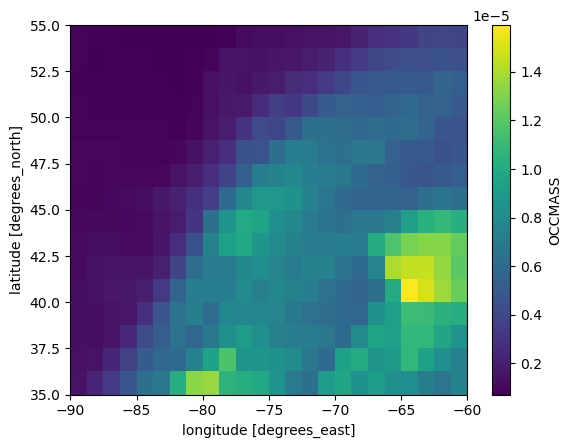

In [65]:
MAXOCC = OCC.max(dim="time")
MAXOCC.plot()
#plotting the max for OCC

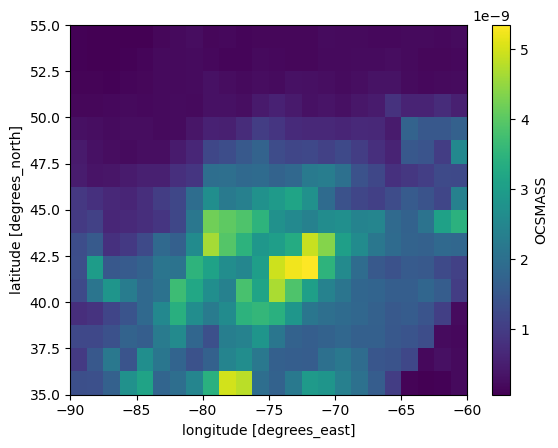

In [66]:
MAXOCS = OCS.max(dim="time")
MAXOCS.plot()
#plotting the max for OCS

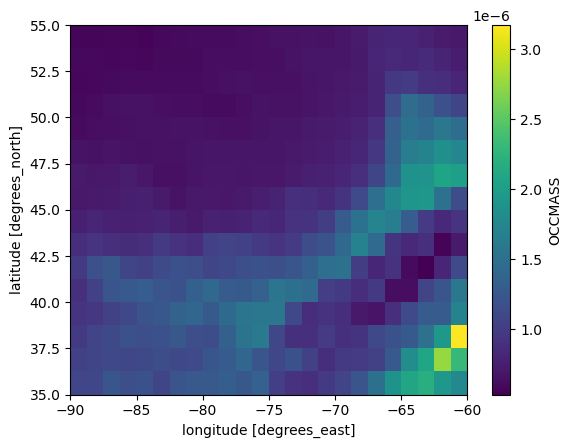

In [67]:
MINOCC = OCC.min(dim='time')
MINOCC.plot()
#plotting the min for OCC

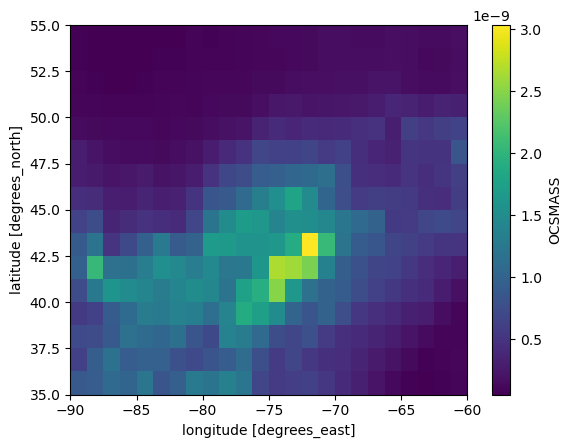

In [68]:
MINOCS = OCS.mean(dim='time')
MINOCS.plot()
#plotting the min for OCS

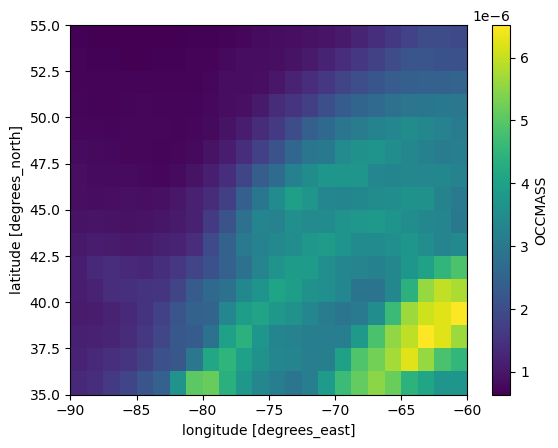

In [69]:
MEANOCC = OCC.mean(dim='time')
MEANOCC.plot()
#plotting the mean for OCC

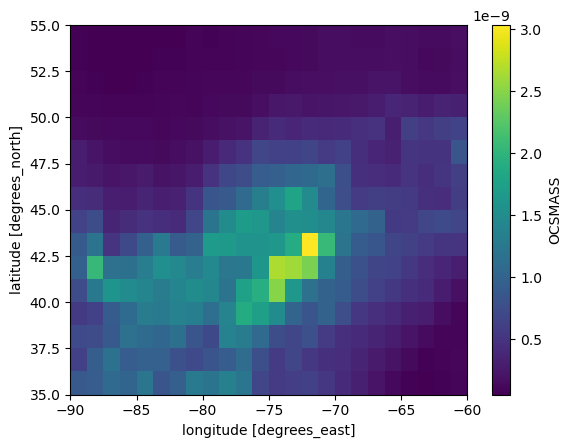

In [70]:
MEANOCS = OCS.mean(dim='time')
MEANOCS.plot()
#plotting the mean for OCS

data.close()
#close the dataset

I now want to make a plot that can help me compare 3 different times in a given day, while also showing me a map to help better understand where the hot spots are/ low spots. The first box will be for OCC and the second will be for OCS. 

For the "time=" you can change the time to show any amount of hours you'd like. All you have to do is change the hour number.

This is where "axs" works and has no problems, as stated before, it doesn't work for any of the plots that have no borders.

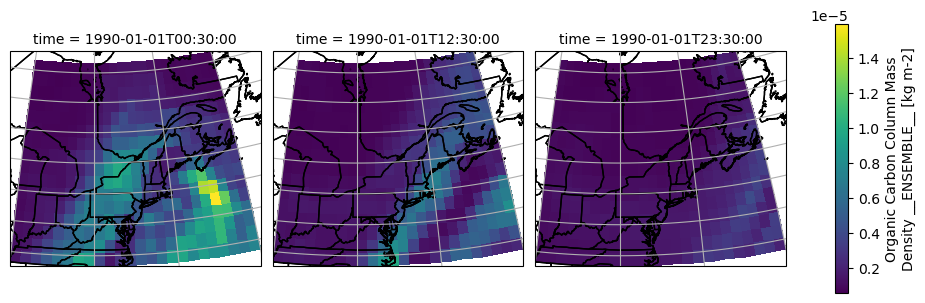

In [85]:
dataset = xr.open_dataset('January/MERRA2_100.tavg1_2d_aer_Nx.19900101.SUB.nc')
OCC = dataset.OCCMASS
                #change the numbers here to change hour, applies to all code blocks
p = OCC.isel(time=[0, 12, 23]).plot(transform=ccrs.PlateCarree(),
    col="time",
    subplot_kws={"projection": ccrs.Orthographic(-80, 35)},
)

BORDERS = cartopy.feature.NaturalEarthFeature('cultural', 'admin_1_states_provinces', '10m', edgecolor='black', facecolor='none')

for ax in p.axs.flat:
    ax.coastlines()
    ax.gridlines()
    ax.add_feature(BORDERS, edgecolor='black')
plt.show()

I will now make a plot for January 1st for OCS.

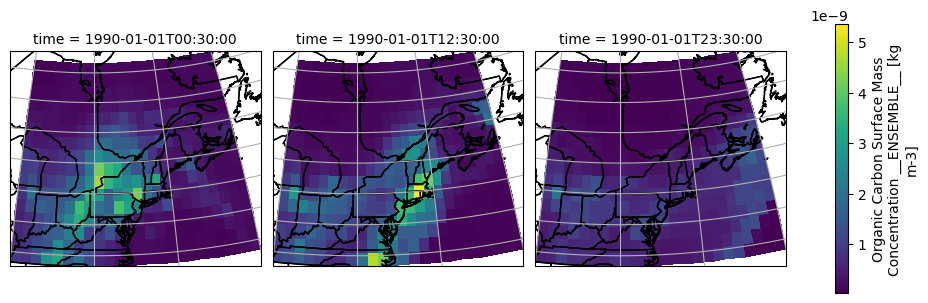

In [72]:
OCS = dataset.OCSMASS
p = OCS.isel(time=[0, 12, 23]).plot(transform=ccrs.PlateCarree(),
    col="time",
    subplot_kws={"projection": ccrs.Orthographic(-80, 35)},
)

BORDERS = cartopy.feature.NaturalEarthFeature('cultural', 'admin_1_states_provinces', '10m', edgecolor='black', facecolor='none')

for ax in p.axs.flat:
    ax.coastlines()
    ax.gridlines()
    ax.add_feature(BORDERS, edgecolor='black')
plt.show()

Now, I want to be able to find the max value for a given day/ the min. While also finding the exact time the output is from.

In [73]:
nc_file = nc.Dataset('January/MERRA2_100.tavg1_2d_aer_Nx.19900101.SUB.nc','r')

variable = nc_file.variables['OCCMASS']
time_var = nc_file.variables['time']

time_values = time_var[:]
time_units = time_var.units

max_index = np.unravel_index(np.argmax(variable[:], axis=None), variable.shape)

#max value and the max time
max_value = variable[:].max()
max_time = nc.num2date(time_values[max_index[0]], time_units)

#min value and the min time
min_value = variable[:].min()
min_time = nc.num2date(time_values[max_index[0]], time_units)

print('Max value:', max_value)
print('Time of max value:', max_time)

print('Min value:', min_value)
print('Time of the min value:', min_time)

nc_file.close

Max value: 1.5927384e-05
Time of max value: 1990-01-01 00:30:00
Min value: 5.3528174e-07
Time of the min value: 1990-01-01 00:30:00


<function Dataset.close>

We can now plot the first 3 hours of the day as the max and the min accure at the same time. Something we need to think of now is that we want to average the data for every hour of the day to find which hour has the highest average.

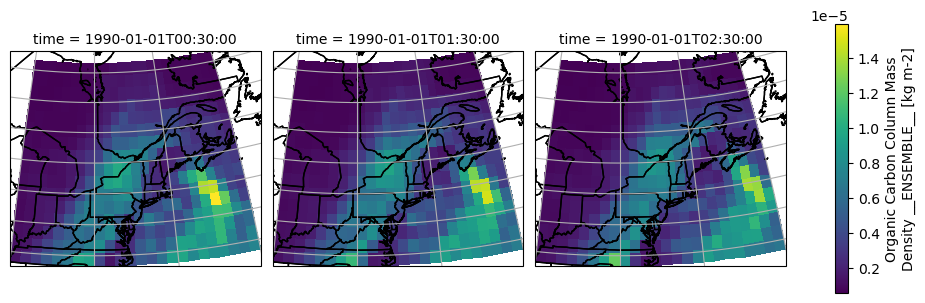

In [29]:
dataset = xr.open_dataset('January/MERRA2_100.tavg1_2d_aer_Nx.19900101.SUB.nc')
OCC = dataset.OCCMASS
p = OCC.isel(time=[0, 1, 2]).plot(transform=ccrs.PlateCarree(),
    col="time",
    subplot_kws={"projection": ccrs.Orthographic(-80, 35)},
)

BORDERS = cartopy.feature.NaturalEarthFeature('cultural', 'admin_1_states_provinces', '10m', edgecolor='black', facecolor='none')

for ax in p.axs.flat:
    ax.coastlines()
    ax.gridlines()
    ax.add_feature(BORDERS, edgecolor='black')
plt.show()

The next 2 boxes will be like the top 2. However they are for OCS.

In [47]:
nc_file = nc.Dataset('January/MERRA2_100.tavg1_2d_aer_Nx.19900101.SUB.nc','r')

variable = nc_file.variables['OCSMASS']
time_var = nc_file.variables['time']

time_values = time_var[:]
time_units = time_var.units

max_index = np.unravel_index(np.argmax(variable[:], axis=None), variable.shape)

#max value and the max time
max_value = variable[:].max()
max_time = nc.num2date(time_values[max_index[0]], time_units)

#min value and the min time
min_value = variable[:].min()
min_time = nc.num2date(time_values[max_index[0]], time_units)

print('Max value:', max_value)
print('Time of max value:', max_time)

print('Min value:', min_value)
print('Time of the min value:', min_time)

nc_file.close

Max value: 5.347374e-09
Time of max value: 1990-01-01 12:30:00
Min value: 3.1570246e-11
Time of the min value: 1990-01-01 12:30:00


<function Dataset.close>

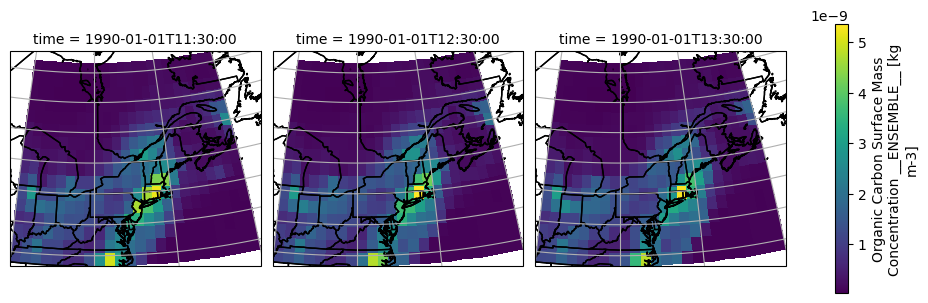

In [32]:
dataset = xr.open_dataset('January/MERRA2_100.tavg1_2d_aer_Nx.19900101.SUB.nc')
OCS = dataset.OCSMASS
p = OCS.isel(time=[11, 12, 13]).plot(transform=ccrs.PlateCarree(),
    col="time",
    subplot_kws={"projection": ccrs.Orthographic(-80, 35)},
)

BORDERS = cartopy.feature.NaturalEarthFeature('cultural', 'admin_1_states_provinces', '10m', edgecolor='black', facecolor='none')

for ax in p.axs.flat:
    ax.coastlines()
    ax.gridlines()
    ax.add_feature(BORDERS, edgecolor='black')
plt.show()

I find it odd that for both data sets, the max and min occur at the same time. We haven't averaged it yet, but theres 24 hour in the day and many datapoints.

Let's now see if we can pull the max value from both datasets for the whole month of January 1990.

In [34]:
folder_path = "/Users/jeffr/Internship/January"

max_value = -np.inf
max_time = None

for filename in os.listdir(folder_path):
    if filename.endswith('.nc'):
        nc_file = nc.Dataset(os.path.join(folder_path, filename), 'r')
        
        variable = nc_file.variables['OCCMASS']
        time_var = nc_file.variables['time']
        
        time_values = time_var[:]
        time_units = time_var.units
        
        max_index = np.unravel_index(np.argmax(variable[:], axis=None), variable.shape)
        
        if variable[:].max() > max_value:
            max_value = variable[:].max()
            max_time = nc.num2date(time_values[max_index[0]], time_units)
nc_file.close()

print('Max value:', max_value)
print('Time of max value:', max_time)

Max value: 3.232587e-05
Time of max value: 1990-01-17 08:30:00


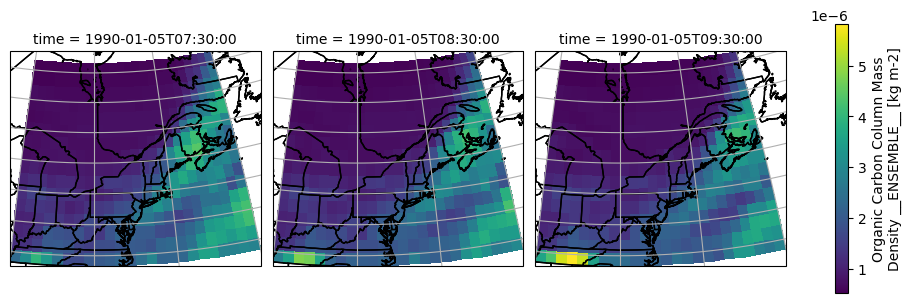

In [19]:
dataset = xr.open_dataset('January/MERRA2_100.tavg1_2d_aer_Nx.19900105.SUB.nc')
BCC = dataset.OCCMASS
p = BCC.isel(time=[7, 8, 9]).plot(transform=ccrs.PlateCarree(),
    col="time",
    subplot_kws={"projection": ccrs.Orthographic(-80, 35)},
)

BORDERS = cartopy.feature.NaturalEarthFeature('cultural', 'admin_1_states_provinces',
                                                   '10m', edgecolor='black', facecolor='none')
for ax in p.axs.flat:
    ax.coastlines()
    ax.gridlines()
    ax.add_feature(BORDERS, edgecolor='black')
plt.show()
dataset.close()

And now the same for OCS.

In [37]:
folder_path = "/Users/jeffr/Internship/January"

max_value = -np.inf
max_time = None

for filename in os.listdir(folder_path):
    if filename.endswith('.nc'):
        nc_file = nc.Dataset(os.path.join(folder_path, filename), 'r')
        
        variable = nc_file.variables['OCSMASS']
        time_var = nc_file.variables['time']
        
        time_values = time_var[:]
        time_units = time_var.units
        
        max_index = np.unravel_index(np.argmax(variable[:], axis=None), variable.shape)
        
        if variable[:].max() > max_value:
            max_value = variable[:].max()
            max_time = nc.num2date(time_values[max_index[0]], time_units)
nc_file.close()

print('Max value:', max_value)
print('Time of max value:', max_time)

Max value: 1.9235824e-08
Time of max value: 1990-01-06 12:30:00


After further research, I understand why New York City is bright yellow for the OCS max. The power plants that use fossil fuels release Organic Carbon when burned. I thank Dr. Barlow for that information.

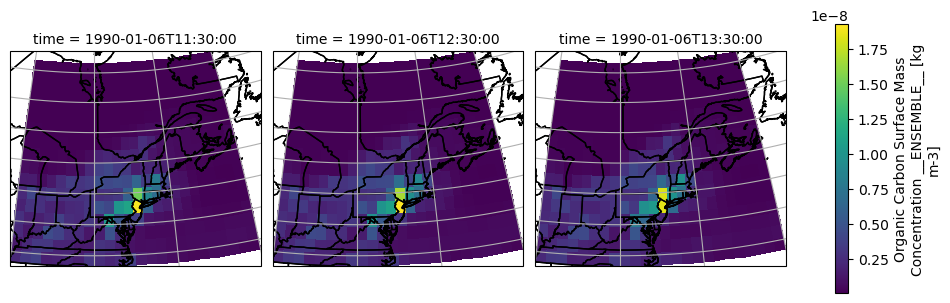

In [39]:
dataset = xr.open_dataset('January/MERRA2_100.tavg1_2d_aer_Nx.19900106.SUB.nc')
BCC = dataset.OCSMASS
p = BCC.isel(time=[11, 12, 13]).plot(transform=ccrs.PlateCarree(),
    col="time",
    subplot_kws={"projection": ccrs.Orthographic(-80, 35)},
)

BORDERS = cartopy.feature.NaturalEarthFeature('cultural', 'admin_1_states_provinces',
                                                   '10m', edgecolor='black', facecolor='none')
for ax in p.axs.flat:
    ax.coastlines()
    ax.gridlines()
    ax.add_feature(BORDERS, edgecolor='black')
plt.show()
dataset.close()

Now while it is great that I can pull from all the files and find the day with the highest amount of OCC and OCS, it is only the exact highest amount for 1 of the individual data boxes. What I really want is to average the data for every hour, and find the hour that has the highest amount of polution for each box. Thanks to Ali, Maddey and I have been able to plot the average for our datasets.

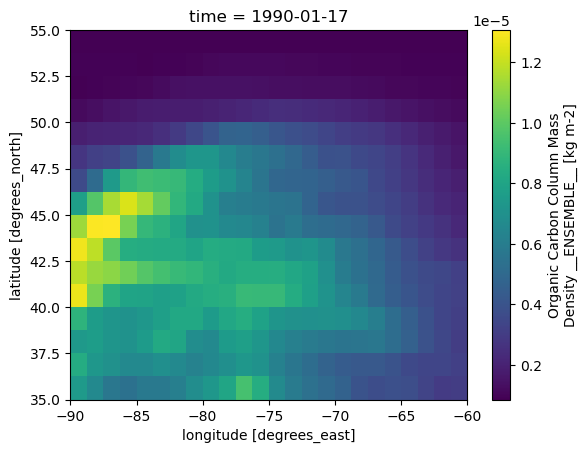

In [48]:
data = xr.open_mfdataset('/USers/jeffr/Internship/January/MERRA2_100.tavg1_2d_aer_Nx.199001*')

ds = data.OCCMASS
ds = ds.load()

daily_ave = ds.resample(time='D').mean()
spatial_ave = daily_ave.mean(dim = ("lat","lon"))

max_day = spatial_ave.max("time")
index_max = np.where(spatial_ave == max_day) 

daily_ave.isel(time = index_max[0]).plot()

I will now use his same code to find the averge of each box for OCS.

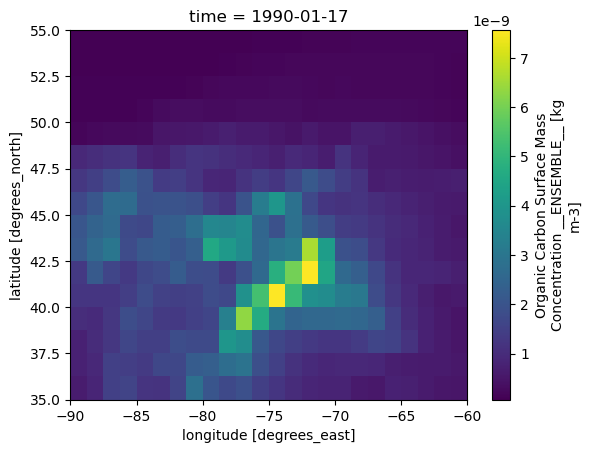

In [83]:
data = xr.open_mfdataset('/USers/jeffr/Internship/January/MERRA2_100.tavg1_2d_aer_Nx.199001*')

ds = data.OCSMASS
ds = ds.load()

daily_ave = ds.resample(time='D').mean()
spatial_ave = daily_ave.mean(dim = ("lat","lon"))

max_day = spatial_ave.max("time")
index_max = np.where(spatial_ave == max_day) 

daily_ave.isel(time = index_max[0]).plot()

If I had more time I would have liked to add the map borders to make the plot look better. I tried for a few hours to plot the map on top of the plot but I was unfortuately unsuccessful. I would have liked to see a whole years worth of data, as well as the whole US. Finding a day that had a wildfire and looking at the path the polution goes over the US as it travels to the east coast would be helpful in trying to understand the affects the wildfires have. 

Learning python was fun, and I will continue to grow my understanding of this language. I believe all Meteorology students should learn this language over all others, with my main reason being plots. There is much more I would like to learn, like how to make moving objects, and gifs.

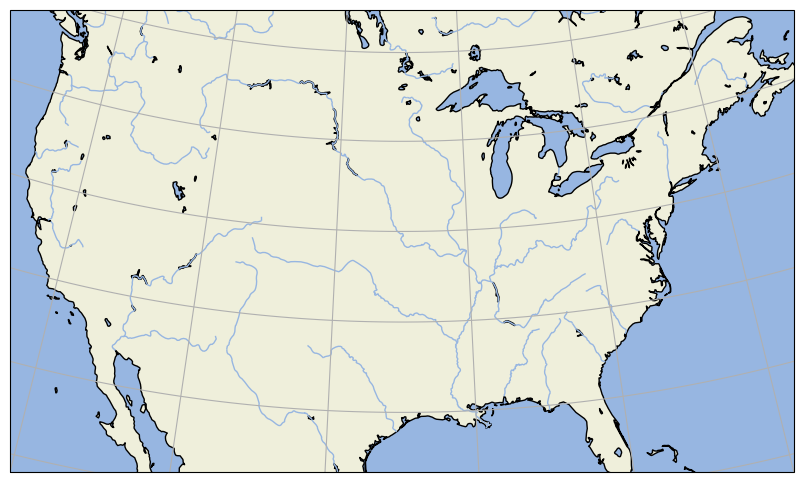

In [86]:
central_lat = 37.5
central_lon = -96
extent = [-120, -70, 24, 50.5]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax.add_feature(cartopy.feature.RIVERS)
ax.gridlines()

I just wanted to add this map that I made when learning python, this would be used in the bigger datasets that incorporate the whole US.